### **PCA (Principal component analysis)**
* 주성분분석은 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술이다.
* 데이터의 회전 후에 데이터 설명도에 따라 중요도가 판단되고, 이 중의 일부 데이터가 선택된다.

In [1]:
pip install mglearn

     |████████████████████████████████| 542kB 3.5MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.8-py2.py3-none-any.whl size=582647 sha256=79e731c9f37b38e021f00618ff119de2b9758fad279d217eea7da83c21ea4228
  Stored in directory: /root/.cache/pip/wheels/47/b8/58/ce0c4be41f4efbfb8773eb72782164dbb758685d12ef2732f5
Successfully built mglearn


In [2]:
import mglearn

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


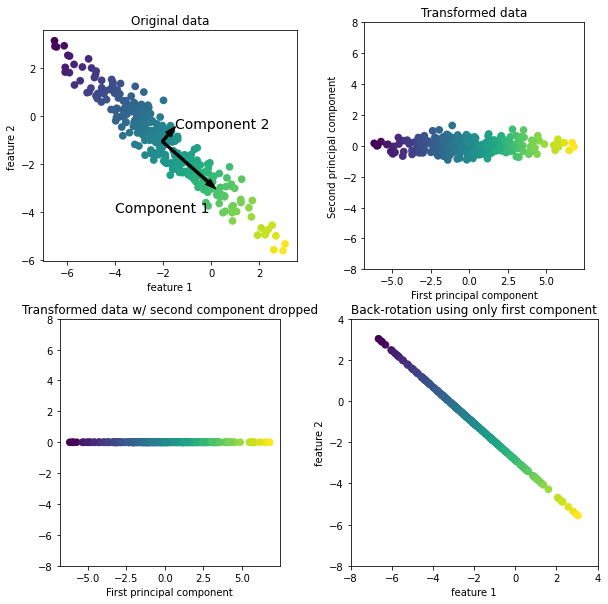

In [3]:
mglearn.plots.plot_pca_illustration()

**1. 첫번째 그래프**
  * PCA 알고리즘은 제일 먼저 '성분1' (분산이 가장 큰 방향)을 찾는다. 데이터에서 가장 많은 정보를 담고 있는 방향이 된다.
  * 첫번째 방향과 직각인 방향 중에서 가장 많은 정보를 담은 방향을 찾는다.
  * 이런 과정을 거쳐 찾은 방향의 데이터는 주된 분산의 방향이라 해서 주성분이라고 한다.
  * 일반적으로 원본 특성(feature)의 갯수만큼 주성분이 있다.
  * 주성분1, 주성분2는 각각 독립이다.

**2. 두번째 그래프**
  * 회전하기 전에 평균을 빼서 중심을 원점에 맞춤
  * 첫번째와 같은 데이터지만, 주성분1과 2를 각각 x축과 y축에 나란하도록 회전
  * PCA에 의해 회전된 두 축은 독립적이다. 상관관계 행렬이 대각선 방향을 제외하고 0이 된다.

**3. 세번째 그래프**
  * 세번째 그래프는 첫번째 주성분만 있다. 2차원>>1차원
  * 원본 특성 중 하나만 남기는 것이 아닌 가장 유용한 방향을 찾은 주성분1만 유지

**4. 네번째 그래프**
  * 데이터에 평균을 더해서 반대로 회전
  * 이 데이터 포인트들은 원래 특성공간에 있지만 첫번째 주성분만 달고 있다.

In [4]:
from sklearn.decomposition import PCA
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
iris = sns.load_dataset('iris')

X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

print(X_iris.shape, y_iris.shape)

(150, 4) (150,)


In [6]:
model = PCA()
X_pca_dat = model.fit(X_iris).transform(X_iris)   # model.fit_transform(X_iris)
print(X_pca_dat.shape, type(X_pca_dat))

(150, 4) <class 'numpy.ndarray'>


In [7]:
X_iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
X_pca_dat[0:5]

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02]])

In [0]:
import pandas as pd

In [0]:
model = PCA(n_components=2)
X_pca2 = model.fit_transform(X_iris)

,0,1
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


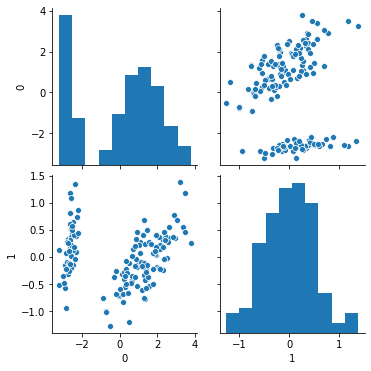

In [19]:
df = pd.DataFrame(X_pca2)
sns.pairplot(df)
df

In [20]:
df.iloc[:,0].head()

0   -2.684126
1   -2.714142
2   -2.888991
3   -2.745343
4   -2.728717
Name: 0, dtype: float64

In [22]:
iris['PCA1'] = df.iloc[:,0]   # 주성분1
iris['PCA2'] = df.iloc[:,1]   # 주성분1
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


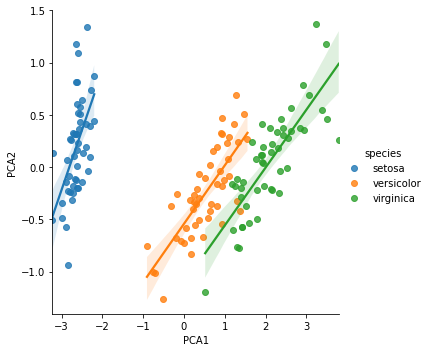

In [23]:
sns.lmplot('PCA1', 'PCA2', hue='species', data=iris)